In [5]:
import numpy as np
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

# LOADED (keep 'X' and 'y')
# data = load_wine()
# X = data.data
# y = data.target 
# print("Dataset feature matrix:", X)
# print("Dataset target vector:", y)

# MANUAL (keep 'data_points')
data_points = np.array([[0,0],[0,1],[1,1],[1,0],[3,0],[3,1],[4,0],[4,1]])
# Initial centers
centers_init = np.array([[0,0],[3,0]])

In [16]:
# KMeans Algorithm (No change)
def k_means(data_points, centers_init, n_clusters, max_iterations=100, tol=1e-4):
    centers = centers_init.copy()
    
    for iteration in range(max_iterations):
        # Calculate distances from each point to each center
        distances = np.linalg.norm(data_points[:, np.newaxis] - centers, axis=2)
        # Assign points to nearest center
        closest_centroids = np.argmin(distances, axis=1)
        
        # Calculate new centers
        new_centers = np.zeros((n_clusters, data_points.shape[1]))
        for cluster_idx in range(n_clusters):
            cluster_points = data_points[closest_centroids == cluster_idx]
            if len(cluster_points) > 0:
                new_centers[cluster_idx] = cluster_points.mean(axis=0)
        
        print(f"Iteration {iteration}, centers:\n{new_centers}")
        
        # Check for convergence
        center_shift = np.linalg.norm(new_centers - centers)
        print(f"  Center shift: {center_shift:.6f}\n")
        
        if center_shift < tol:
            print(f"Converged at iteration {iteration}")
            break
        
        centers = new_centers
    
    return centers, closest_centroids

In [17]:
# LOADED (Change seed, n_clusters range)
# J = {}
# np.random.seed(42)
# for n_clusters in range(2, 11):
#     centers_init = X[np.random.choice(X.shape[0], n_clusters, replace=False)]  
#     centers, labels = k_means(X, centers_init, n_clusters=n_clusters)
#     within_cluster_var = np.sum((X - centers[labels]) ** 2)
#     J[n_clusters] = within_cluster_var
#     print(f"Converged centers for {n_clusters} clusters:", centers)
#     print(f"Within-cluster variance for {n_clusters} clusters:", within_cluster_var)
    
# MANUAL (No change)
print(data_points[:, np.newaxis])
data_points[:, np.newaxis].shape
data_points[:, np.newaxis] - centers_init
np.linalg.norm(data_points [:, np.newaxis] - centers_init, axis=2)
centers, labels = k_means(data_points, centers_init, n_clusters=2)
print("Converged centers :", centers)
print("cluster Labels :", labels)

[[[0 0]]

 [[0 1]]

 [[1 1]]

 [[1 0]]

 [[3 0]]

 [[3 1]]

 [[4 0]]

 [[4 1]]]
Iteration 0, centers:
[[0.5 0.5]
 [3.5 0.5]]
  Center shift: 1.000000

Iteration 1, centers:
[[0.5 0.5]
 [3.5 0.5]]
  Center shift: 0.000000

Converged at iteration 1
Converged centers : [[0.5 0.5]
 [3.5 0.5]]
cluster Labels : [0 0 0 0 1 1 1 1]


Text(0.5, 1.0, 'K-Means Clustering')

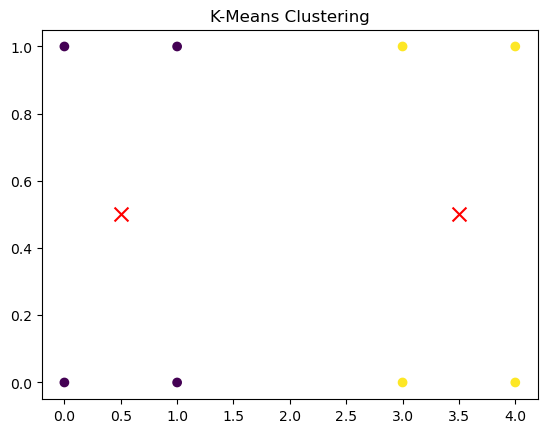

In [8]:
# LOADED (No change)
# plt.plot(J.keys(), J.values(), marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Within-cluster variance')

# MANUAL (No change)
plt.scatter(data_points[:, 0], data_points[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('K-Means Clustering')